In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
languages = ["sw", "ta", "tr", "id", "zh"]

epochs = ["best"]

setups = ["concept_only", "0125", "025", "0375", "05", "0625", "075", "0875", "1", "panlex_dict"]

In [3]:
path_to_repo = "/mnt/nas_home/mrgj4/final_repo/thesis-code/"

In [80]:
lang_results_muniter = {}
for lang in languages:

    setup_results = {}

    # baseline score
    with open(path_to_repo + "experiment_1/{l}/baseline/test/pytorch_model_best.bin-/eval.txt".format(l = lang)) as f:
            lines = f.readlines()
            score = float(lines[0].split(" ")[-2])
    setup_results["0"] = score

    # infused test set score
    for setup in setups:
        with open(path_to_repo + "experiment_3/infused_test_set/{l}/test/{s}/pytorch_model_best.bin-/eval.txt".format(l = lang, s = setup)) as f:
            lines = f.readlines()
            score = float(lines[0].split(" ")[-2])
        setup_results[setup] = score  
    
    lang_results_muniter[lang] = setup_results

In [81]:
[val for key, val in lang_results_muniter["sw"].items() if key != "concept_only" and key != "panlex_dict"]

[52.076, 56.047, 54.964, 54.152, 54.964, 55.957, 56.859, 59.296, 59.838]

In [82]:
# from MaRVL paper
baseline_results_xuniter = {
    "id": 57.1,
    "sw": 55.5,
    "ta": 55.1,
    "tr": 58.0,
    "zh": 55.0,
}

lang_results_xuniter = {}

for lang in languages:

    setup_results = {}

    setup_results["0"] = baseline_results_xuniter[lang]

    # infused test set score
    for setup in setups:
        with open(path_to_repo + "experiment_3/infused_test_set/{l}/xuniter/{s}/pytorch_model_best.bin-/eval.txt".format(l = lang, s = setup)) as f:
            lines = f.readlines()
            score = float(lines[0].split(" ")[-2])
        setup_results[setup] = score  
    
    lang_results_xuniter[lang] = setup_results

In [107]:
def plot_results(lang, muniter_results, xuniter_results, concept_only_point_muniter, panlex_dict_point_muniter, translate_test_baseline_muniter, concept_only_point_xuniter, panlex_dict_point_xuniter, translate_test_baseline_xuniter, ylim=[50, 65]):
    # Set figure default figure size
    plt.rcParams["figure.figsize"] = (20, 8)
    plt.rcParams['figure.dpi'] = 300

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('{l} code-switched test-set'.format(l = lang.upper()))

    x = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100]
    y_muniter = [val for key, val in muniter_results[lang].items() if key != "concept_only" and key != "panlex_dict"]
    y_xuniter = [val for key, val in xuniter_results[lang].items() if key != "concept_only" and key != "panlex_dict"]

    # mUNITER plot

    ax1.plot(x, y_muniter, linestyle="-", marker="o", color="lightgreen", markersize=10, label="Random words code-switching")

    # Translate test
    ax1.axhline(y=translate_test_baseline_muniter, linestyle="--", linewidth=2, color="darkblue")
    ax1.annotate('Translate test baseline', xy=(45,translate_test_baseline_muniter + 0.1), xycoords='data', color="darkblue", fontsize="12")

    # Concept code-switching only
    ax1.plot(concept_only_point_muniter[0], concept_only_point_muniter[1], "rx", markersize = "15", label = "Concepts only code-switching")
    ax1.annotate('({x}%, {y}%)'.format(x = concept_only_point_muniter[0], y = round(concept_only_point_muniter[1], 1)), 
                xy=(concept_only_point_muniter[0] + 0.3, concept_only_point_muniter[1] - 0.6), 
                xycoords='data', color="red", fontsize="12")

    # Panlex dict code-switching only
    ax1.plot(panlex_dict_point_muniter[0], panlex_dict_point_muniter[1], "bx", markersize = "15", label = "Panlex dict code-switching")
    ax1.annotate('({x}%, {y}%)'.format(x = panlex_dict_point_muniter[0], y = round(panlex_dict_point_muniter[1], 1)), 
                xy=(panlex_dict_point_muniter[0] + 0.3, panlex_dict_point_muniter[1] + 0.6), 
                xycoords='data', color="blue", fontsize="12")

    plt.xticks(ticks=[0, 25, 50, 75, 100], 
               labels=["0%", "25%", "50%", "75%", "100%"])
    ax1.set_xlabel("Code-switching (% of total words)")
    ax1.title.set_text("mUNITER")

    ax1.set_ylabel("Accuracy (%)")
    ax1.set_ylim(ylim)
    ax1.grid(axis="both")

    # xUNITER plot

    ax2.plot(x, y_xuniter, linestyle="-", marker="o", color="lightgreen", markersize=10)

    # Translate test
    ax2.axhline(y=translate_test_baseline_xuniter, linestyle="--", linewidth=2, color="darkblue")
    ax2.annotate('Translate test baseline', xy=(45,translate_test_baseline_xuniter + 0.1), xycoords='data', color="darkblue", fontsize="12")

    # Concept code-switching only
    ax2.plot(concept_only_point_xuniter[0], concept_only_point_xuniter[1], "rx", markersize = "15")
    ax2.annotate('({x}%, {y}%)'.format(x = concept_only_point_xuniter[0], y = round(concept_only_point_xuniter[1], 1)), 
                xy=(concept_only_point_xuniter[0] + 0.3, concept_only_point_xuniter[1] - 0.6), 
                xycoords='data', color="red", fontsize="12")

    # Panlex dict code-switching only
    ax2.plot(panlex_dict_point_xuniter[0], panlex_dict_point_xuniter[1], "bx", markersize = "15")
    ax2.annotate('({x}%, {y}%)'.format(x = panlex_dict_point_xuniter[0], y = round(panlex_dict_point_xuniter[1], 1)), 
                xy=(panlex_dict_point_xuniter[0] + 0.3, panlex_dict_point_xuniter[1] + 0.6), 
                xycoords='data', color="blue", fontsize="12")

    plt.xticks(ticks=[0, 25, 50, 75, 100], 
               labels=["0%", "25%", "50%", "75%", "100%"])
    ax2.set_xlabel("Code-switching (% of total words)")
    ax2.title.set_text("xUNITER")

    ax2.set_ylabel("Accuracy (%)")
    ax2.set_ylim(ylim)
    ax2.grid(axis="both")  

    plt.show()

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels, bbox_to_anchor=(0.8, 0.94))

## SW

In [108]:
concept_only_coverage_sw = 11.6
panlex_dict_coverage_sw = 36

translate_test_muniter_sw = 63.4
translate_test_xuniter_sw = 64.1

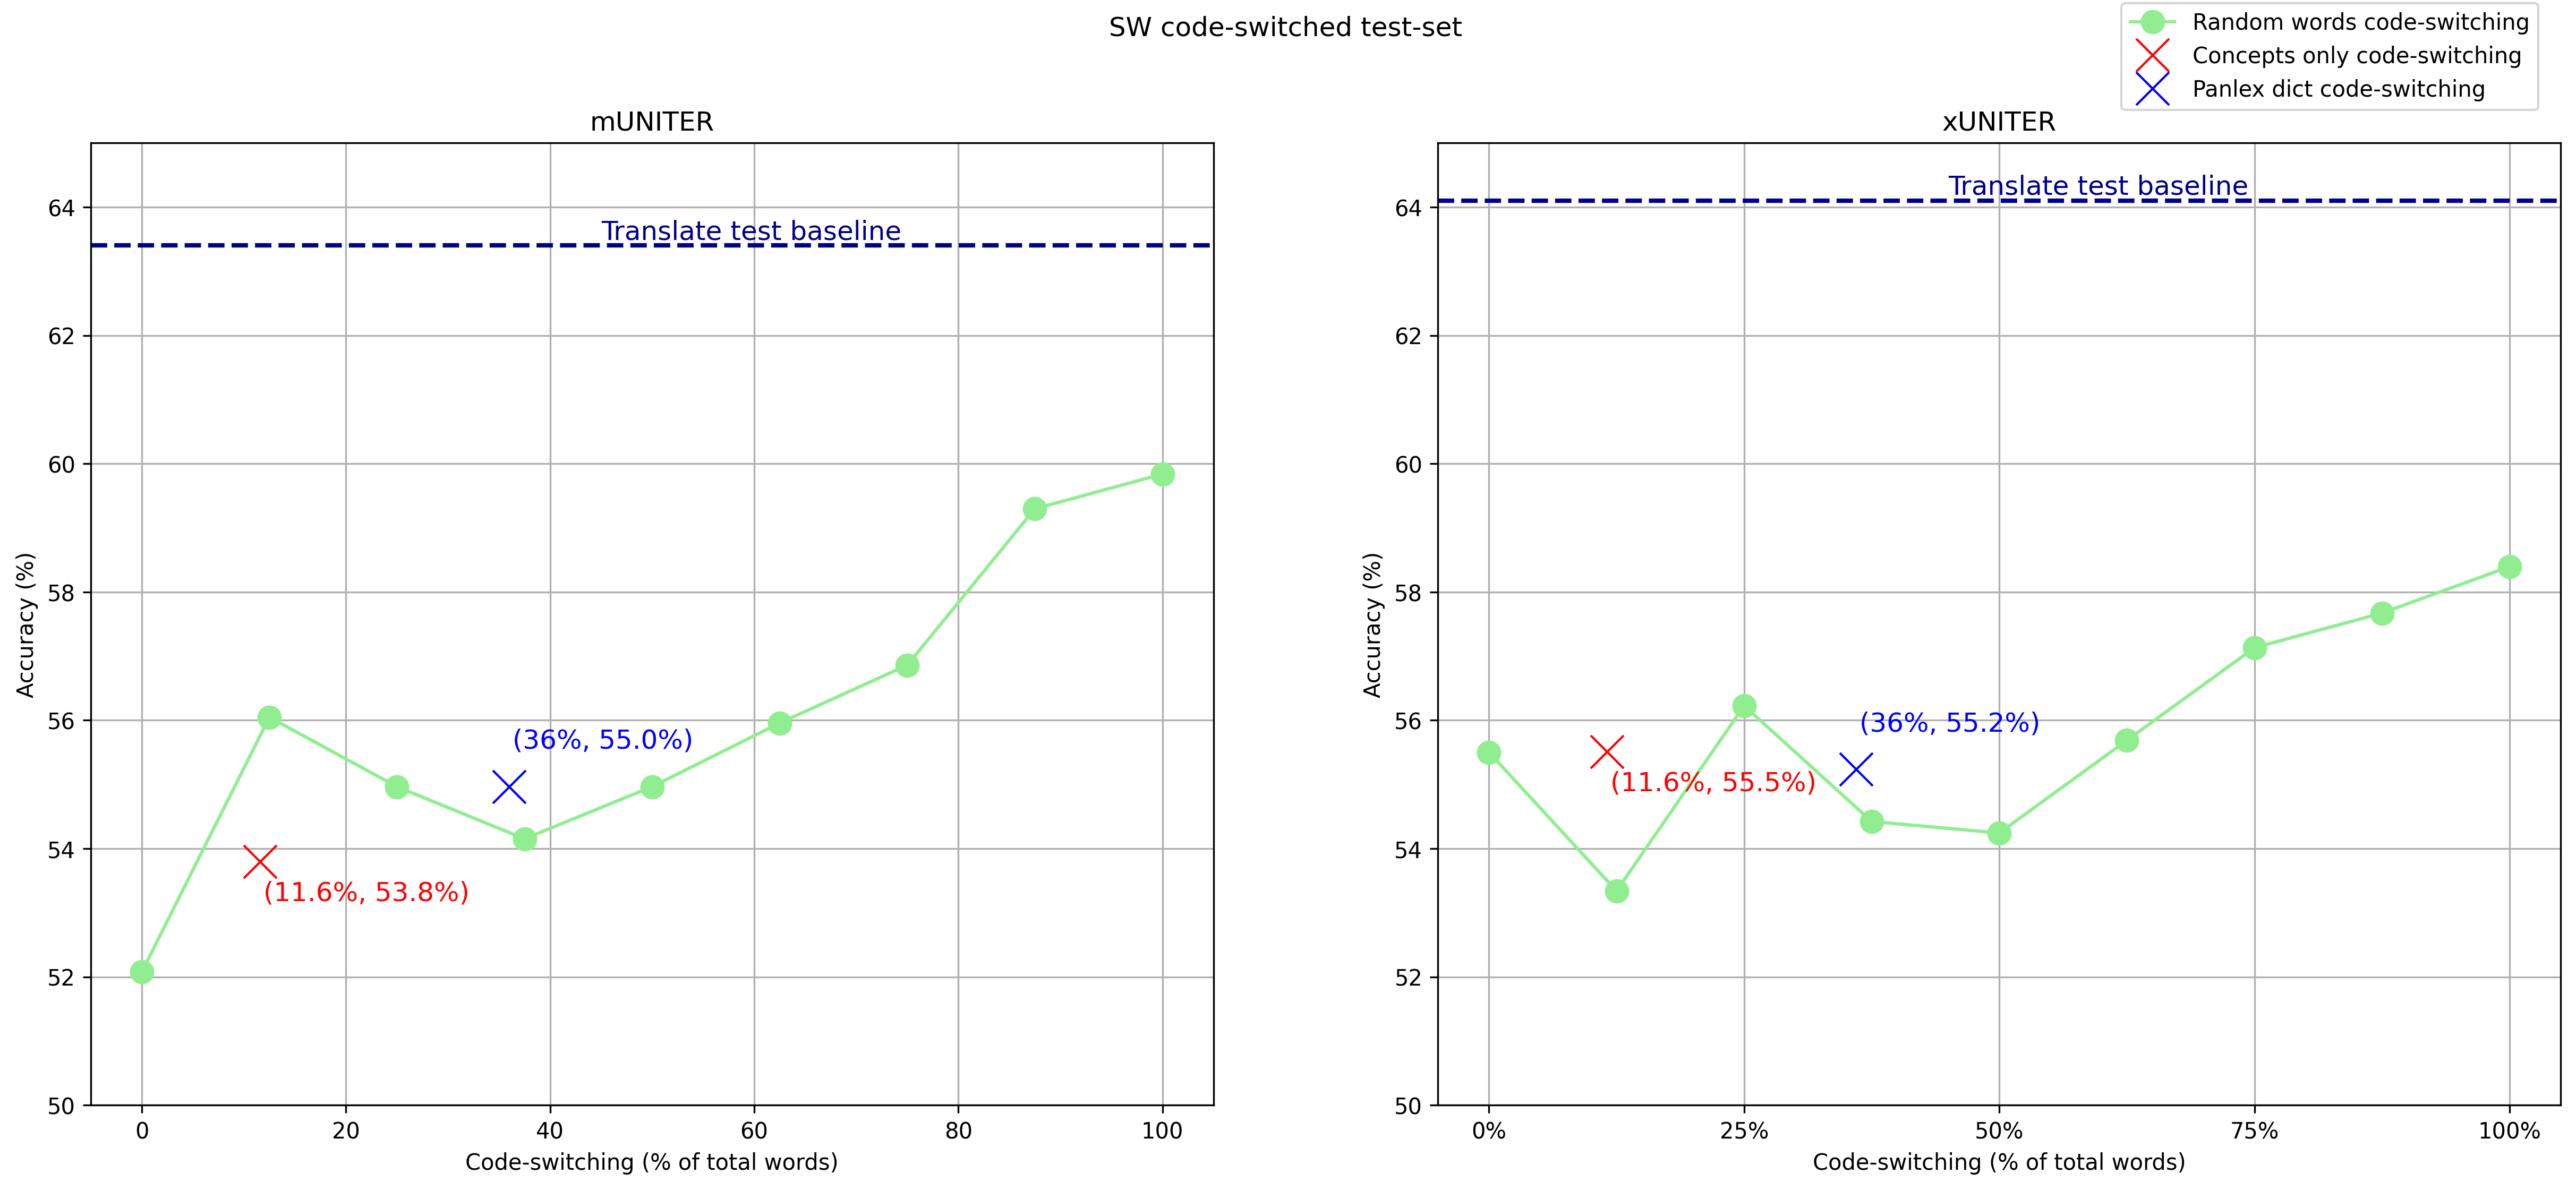

In [109]:
plot_results("sw", 
            lang_results_muniter,
            lang_results_xuniter,
            (concept_only_coverage_sw, lang_results_muniter["sw"]["concept_only"]), 
            (panlex_dict_coverage_sw, lang_results_muniter["sw"]["panlex_dict"]),
            translate_test_muniter_sw,
            (concept_only_coverage_sw, lang_results_xuniter["sw"]["concept_only"]), 
            (panlex_dict_coverage_sw, lang_results_xuniter["sw"]["panlex_dict"]),
            translate_test_xuniter_sw)

## TA

In [112]:
concept_only_coverage_ta = 10.4
panlex_dict_coverage_ta = 17.14

translate_test_muniter_ta = 62.3
translate_test_xuniter_ta = 62.4

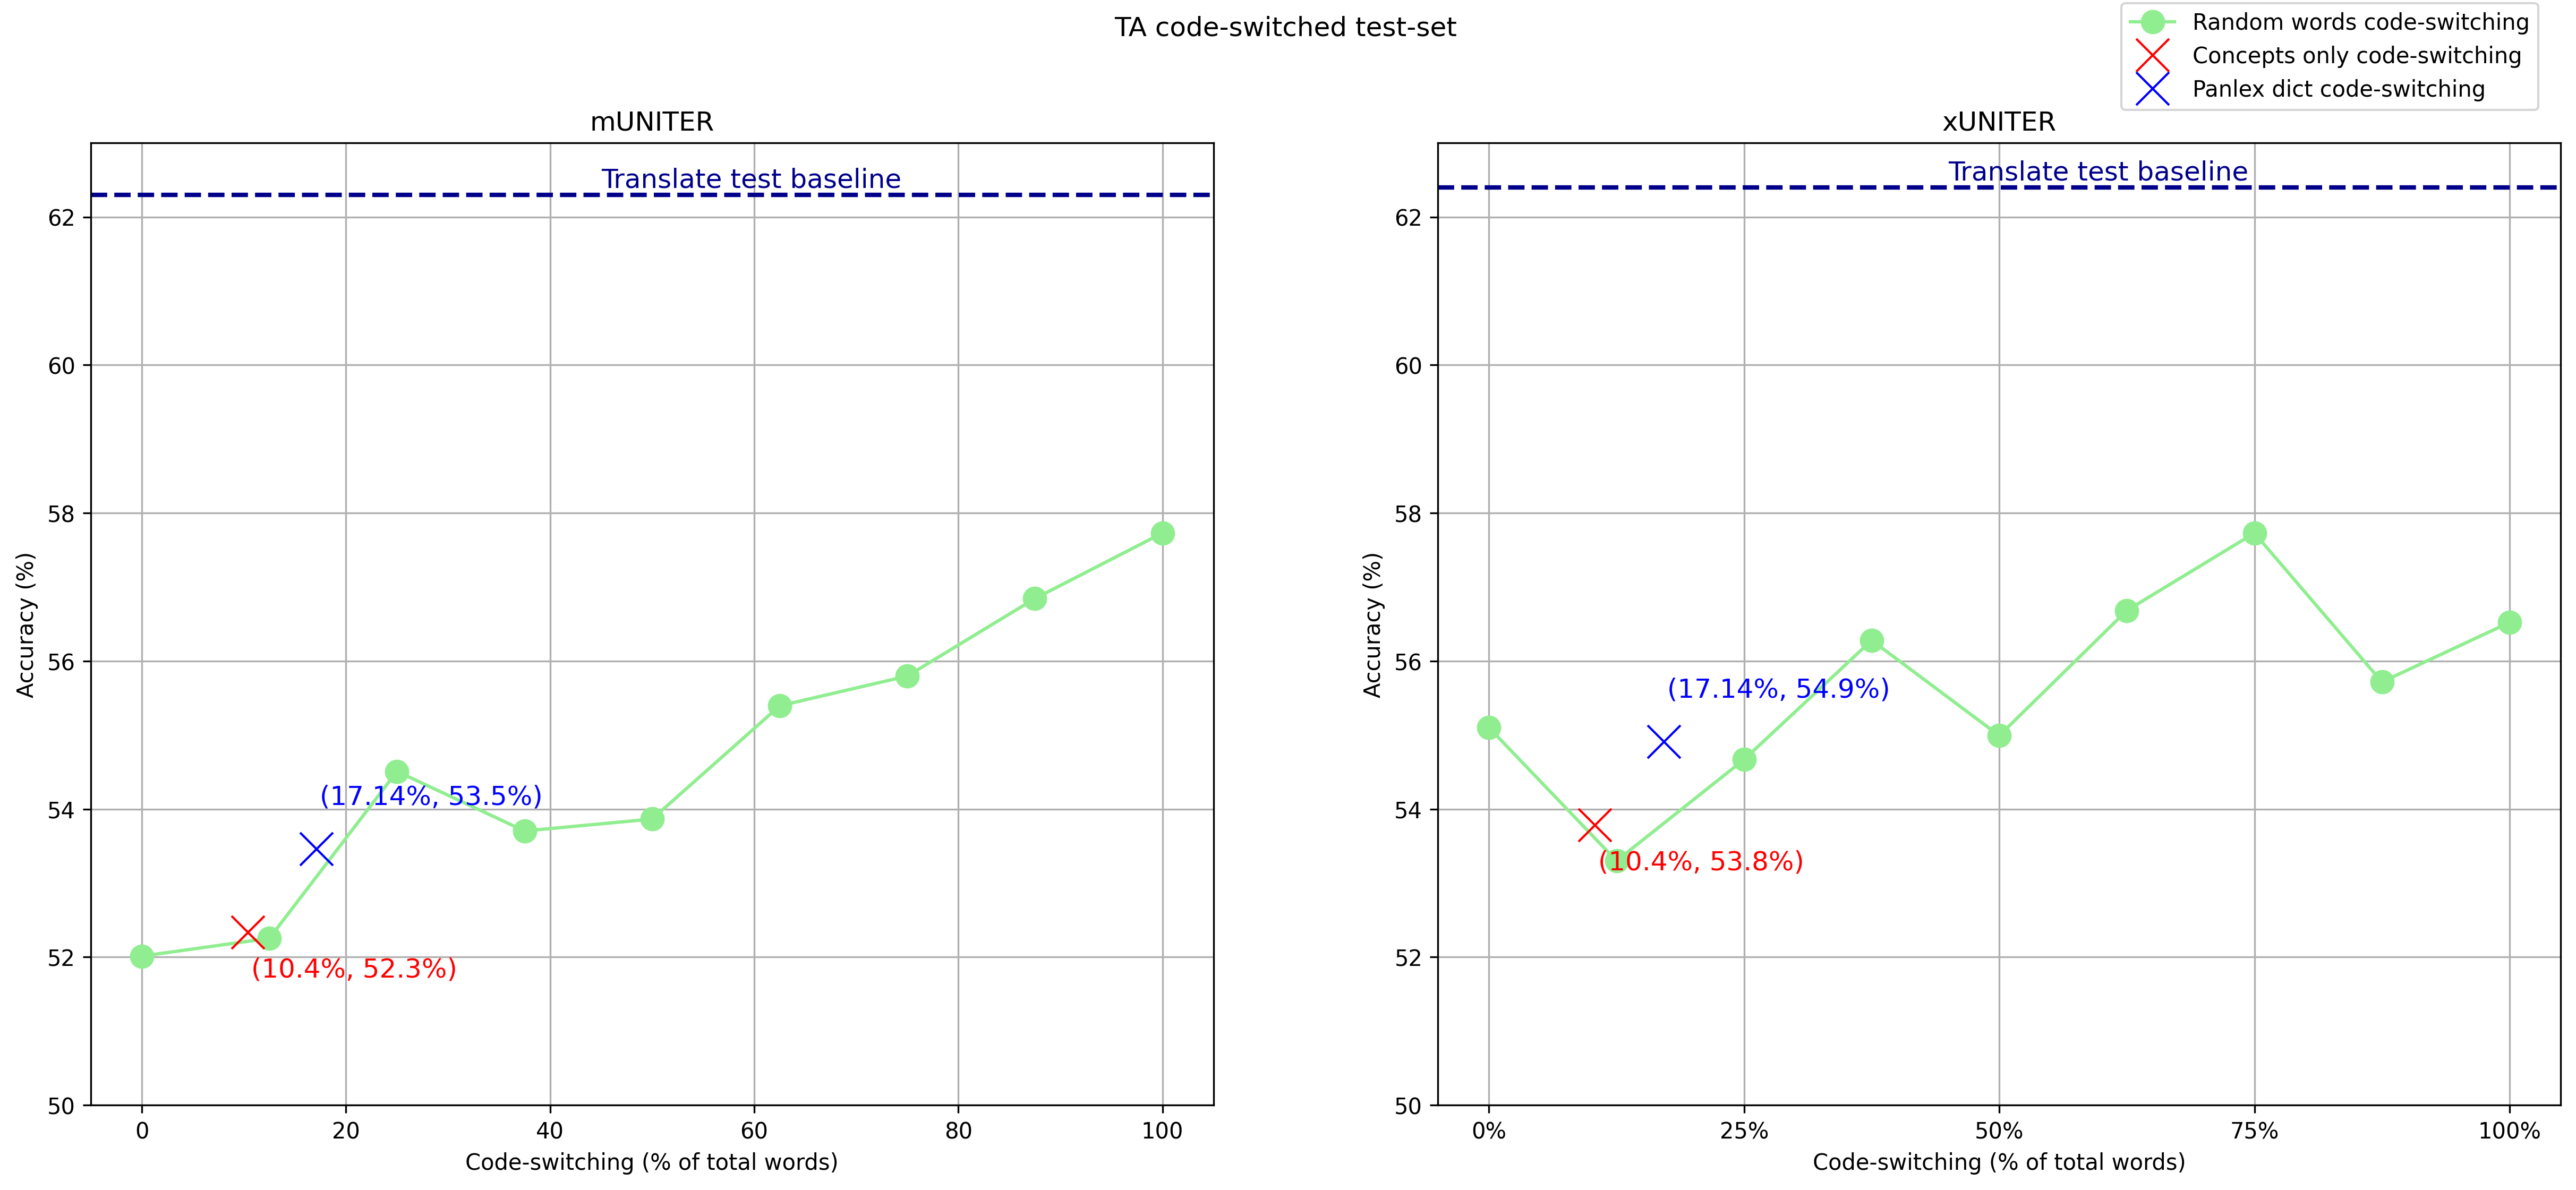

In [114]:
plot_results("ta", 
            lang_results_muniter,
            lang_results_xuniter,
            (concept_only_coverage_ta, lang_results_muniter["ta"]["concept_only"]), 
            (panlex_dict_coverage_ta, lang_results_muniter["ta"]["panlex_dict"]),
            translate_test_muniter_ta,
            (concept_only_coverage_ta, lang_results_xuniter["ta"]["concept_only"]), 
            (panlex_dict_coverage_ta, lang_results_xuniter["ta"]["panlex_dict"]),
            translate_test_xuniter_ta,
            ylim = [50, 63])

## TR

In [115]:
concept_only_coverage_tr = 12.7
panlex_dict_coverage_tr = 79.4

translate_test_muniter_tr = 69.2
translate_test_xuniter_tr = 69.8

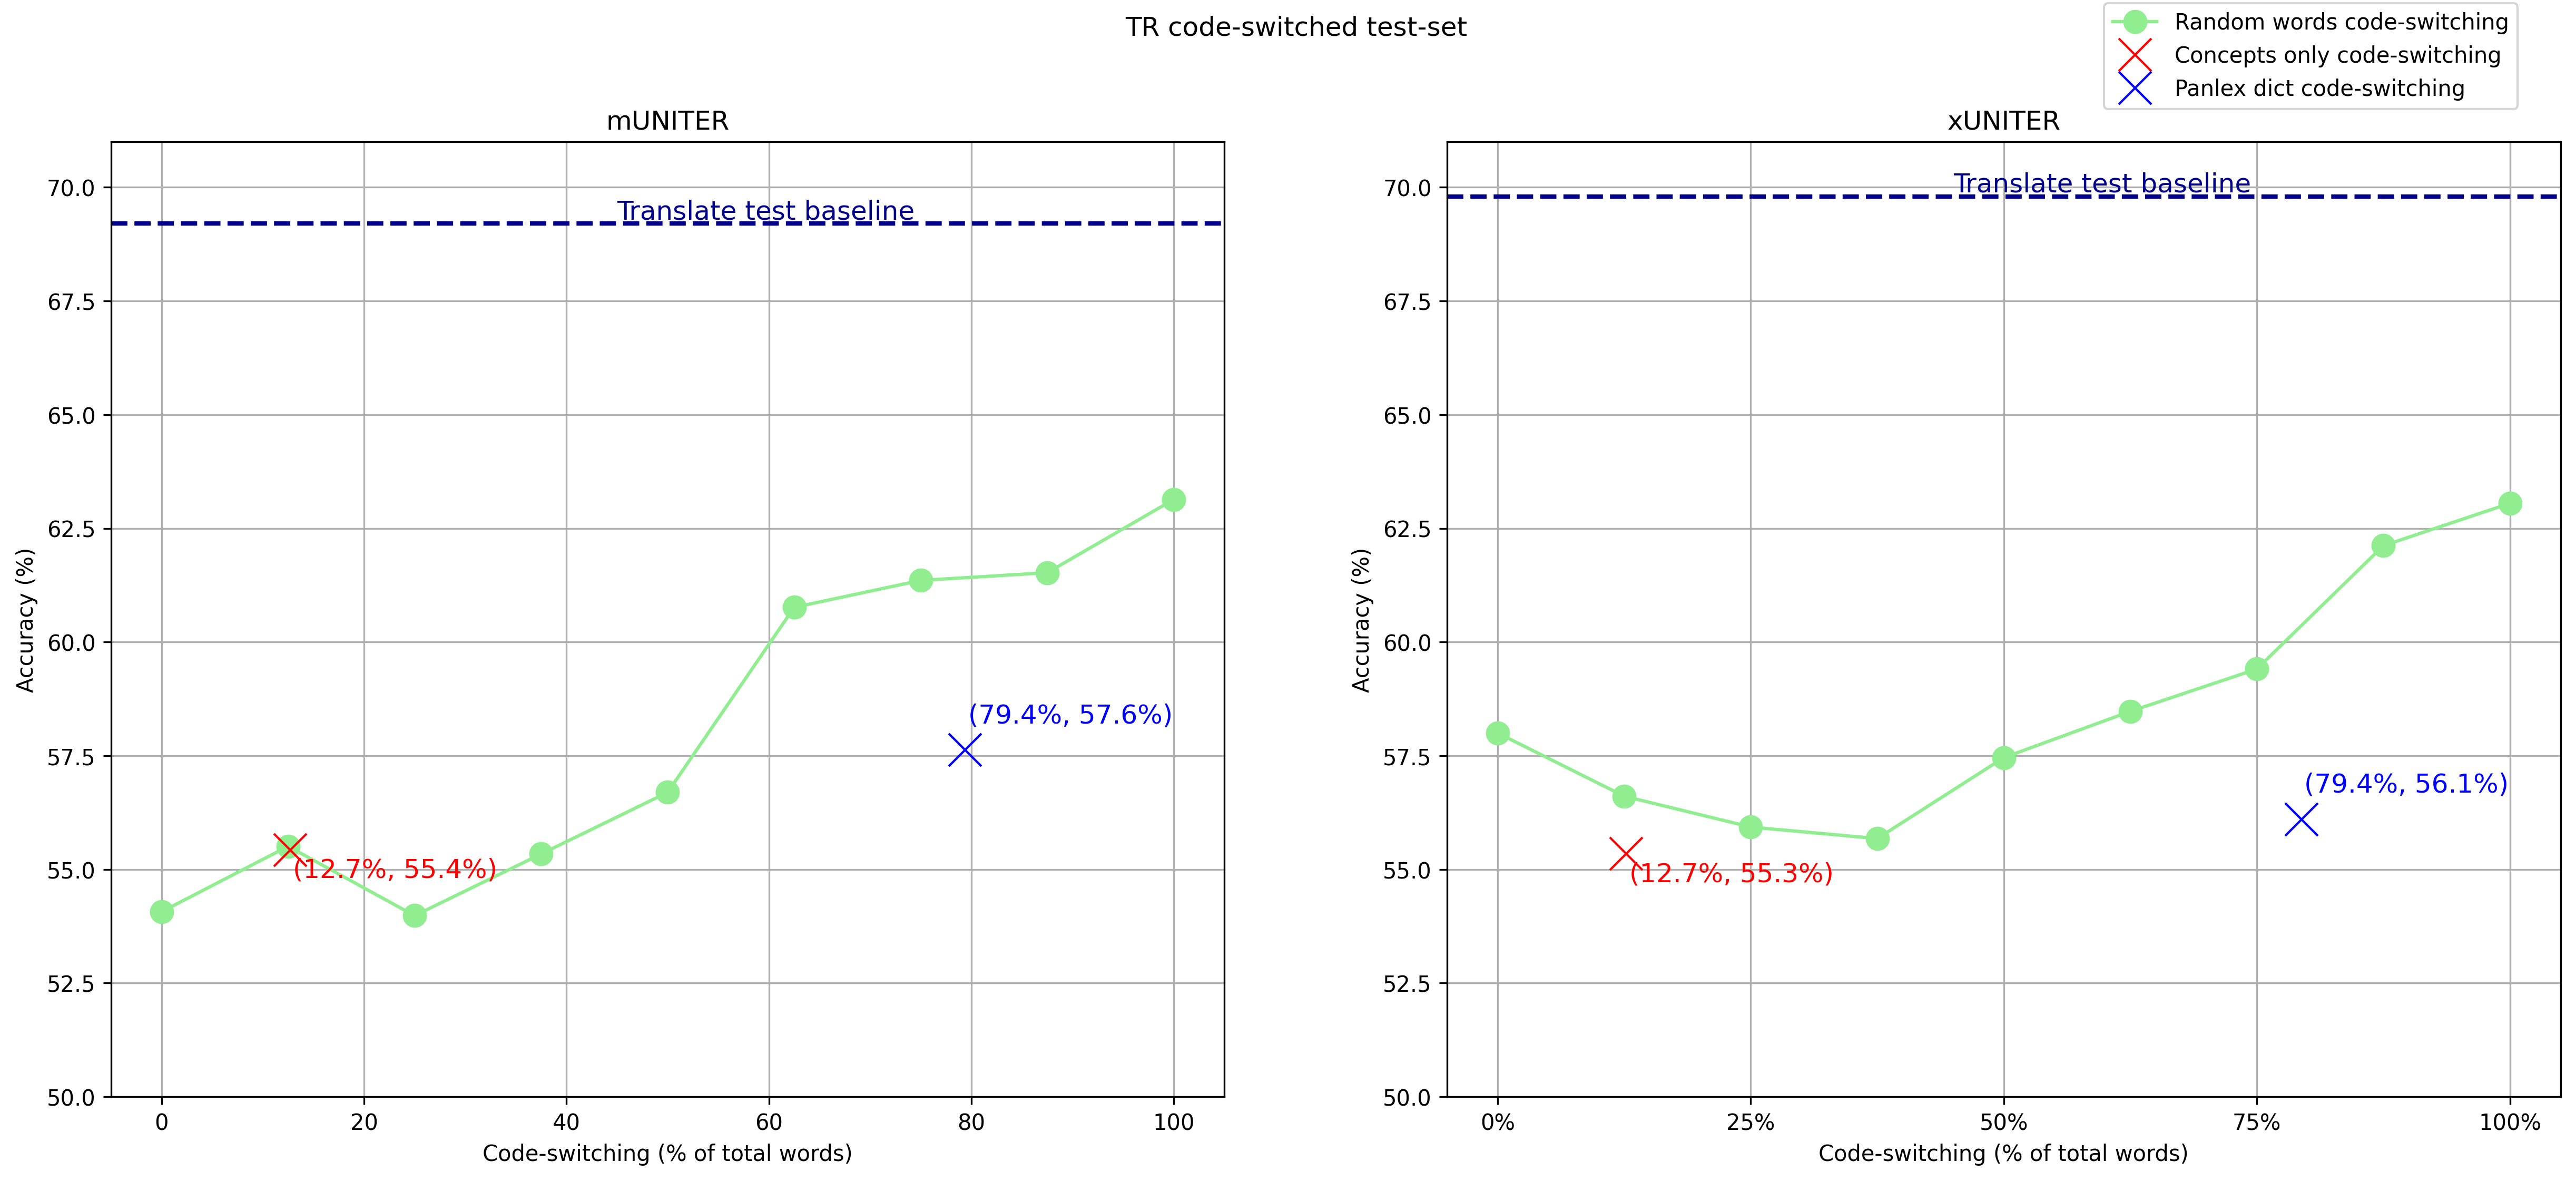

In [118]:
plot_results("tr", 
            lang_results_muniter,
            lang_results_xuniter,
            (concept_only_coverage_tr, lang_results_muniter["tr"]["concept_only"]), 
            (panlex_dict_coverage_tr, lang_results_muniter["tr"]["panlex_dict"]),
            translate_test_muniter_tr,
            (concept_only_coverage_tr, lang_results_xuniter["tr"]["concept_only"]), 
            (panlex_dict_coverage_tr, lang_results_xuniter["tr"]["panlex_dict"]),
            translate_test_xuniter_tr,
            ylim = [50, 71])

## ID

In [119]:
concept_only_coverage_id = 10.2
panlex_dict_coverage_id = 45.71

translate_test_muniter_id = 59.8
translate_test_xuniter_id = 62.4

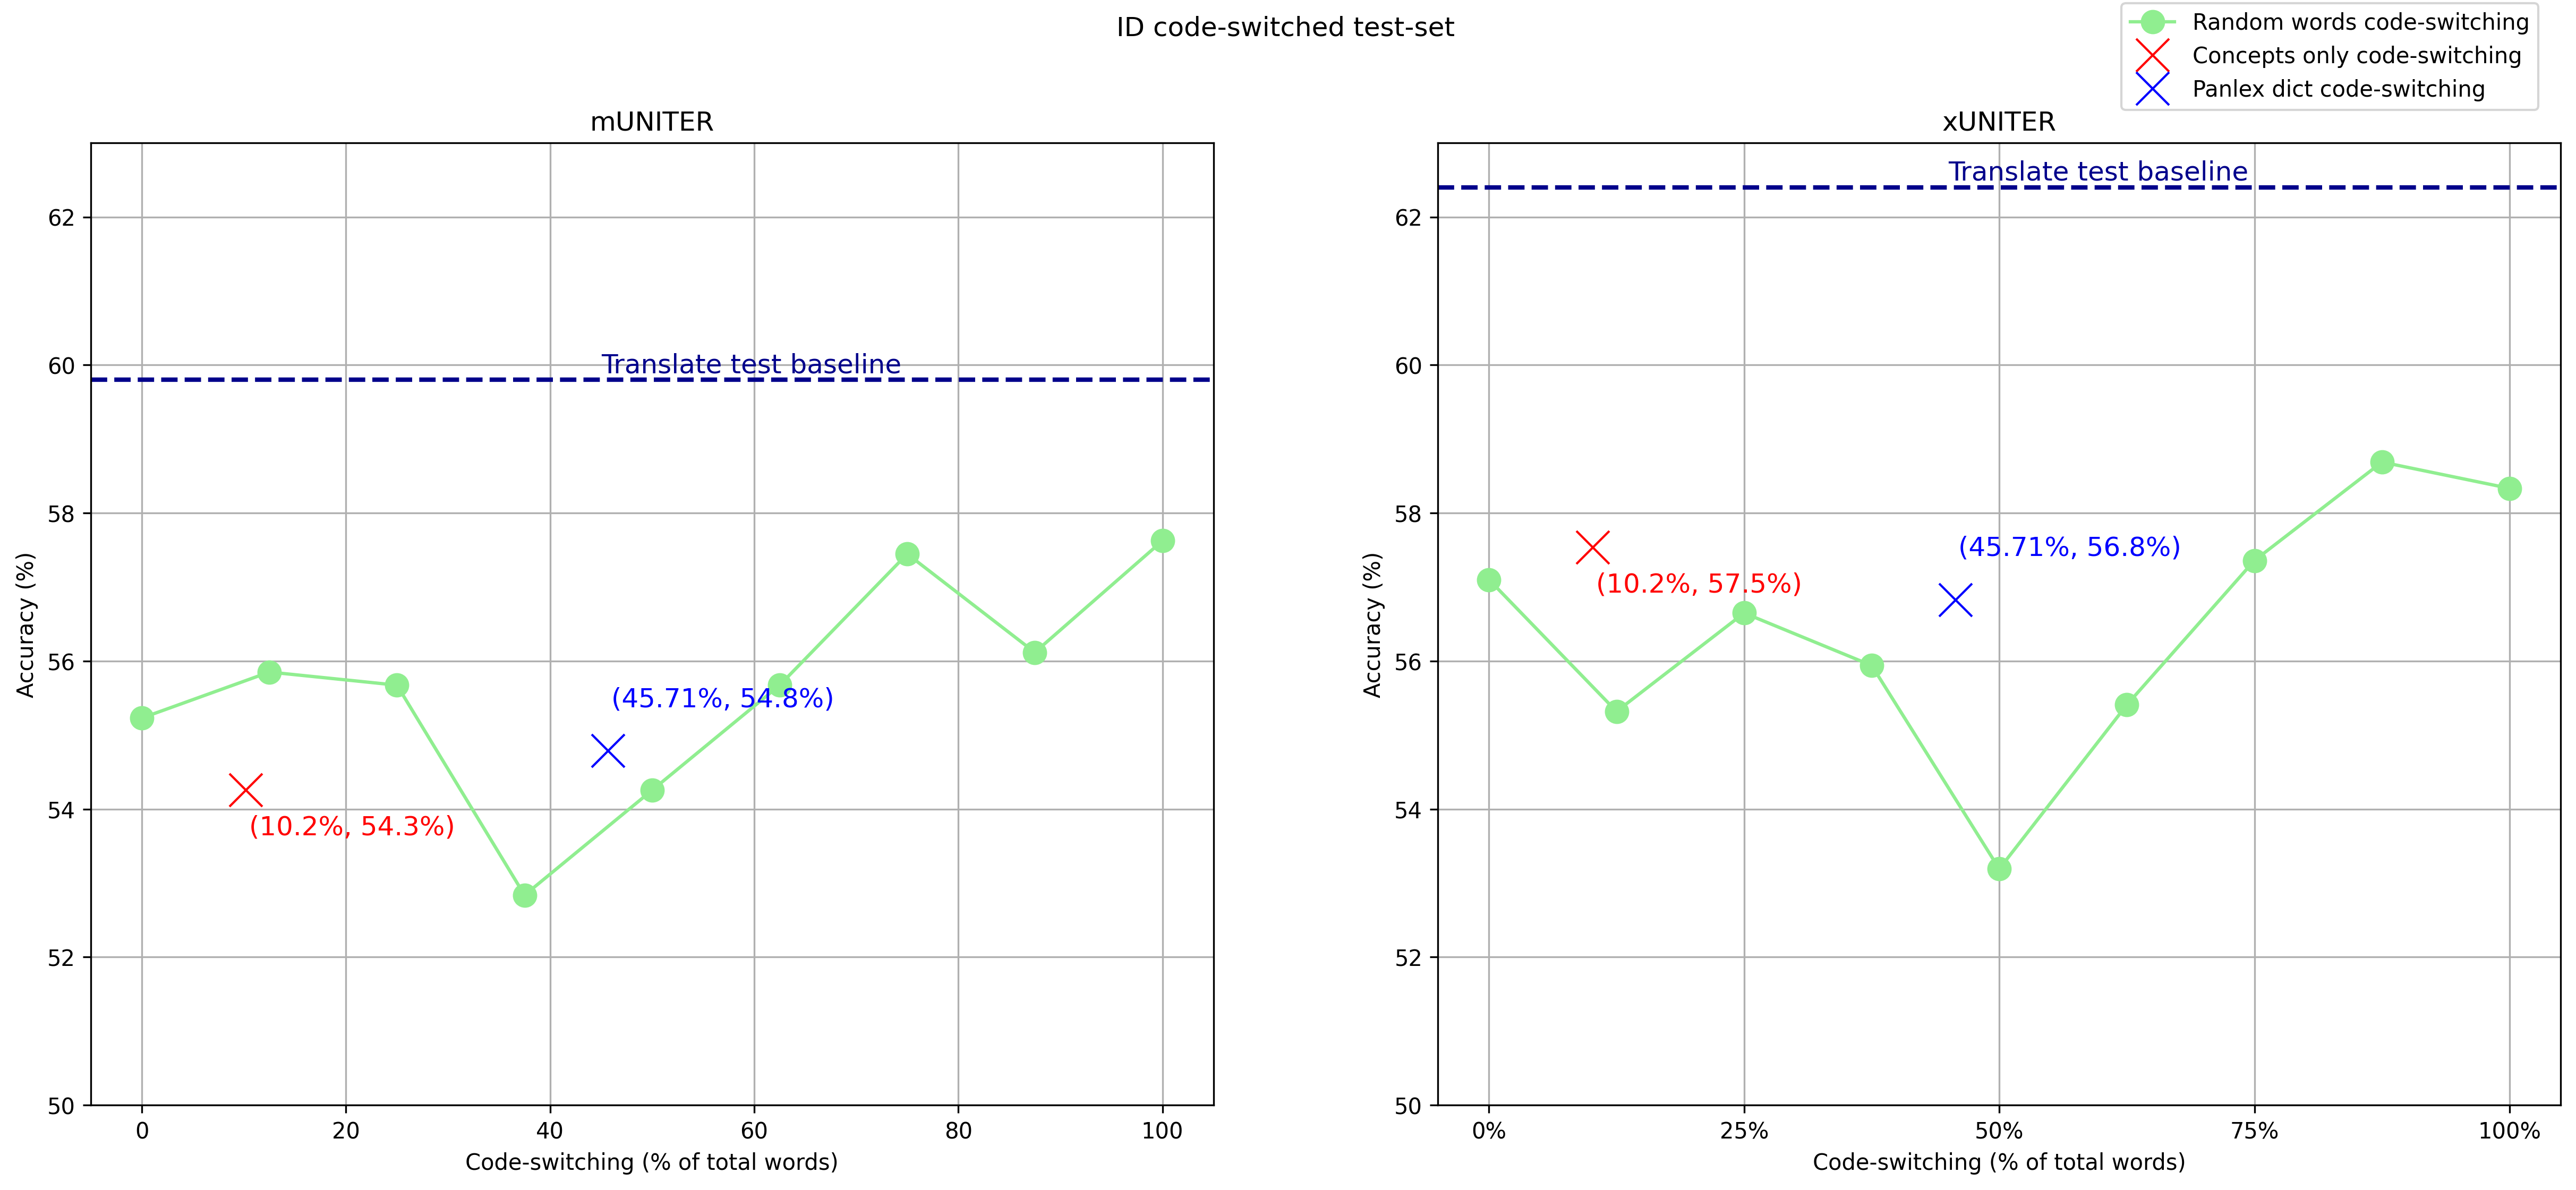

In [120]:
plot_results("id", 
            lang_results_muniter,
            lang_results_xuniter,
            (concept_only_coverage_id, lang_results_muniter["id"]["concept_only"]), 
            (panlex_dict_coverage_id, lang_results_muniter["id"]["panlex_dict"]),
            translate_test_muniter_id,
            (concept_only_coverage_id, lang_results_xuniter["id"]["concept_only"]), 
            (panlex_dict_coverage_id, lang_results_xuniter["id"]["panlex_dict"]),
            translate_test_xuniter_id,
            ylim = [50, 63])

## ZH

In [121]:
concept_only_coverage_zh = 4.9
panlex_dict_coverage_zh = 18.91
translate_test_zh = 62.7

translate_test_muniter_zh = 62.7
translate_test_xuniter_zh = 63.3

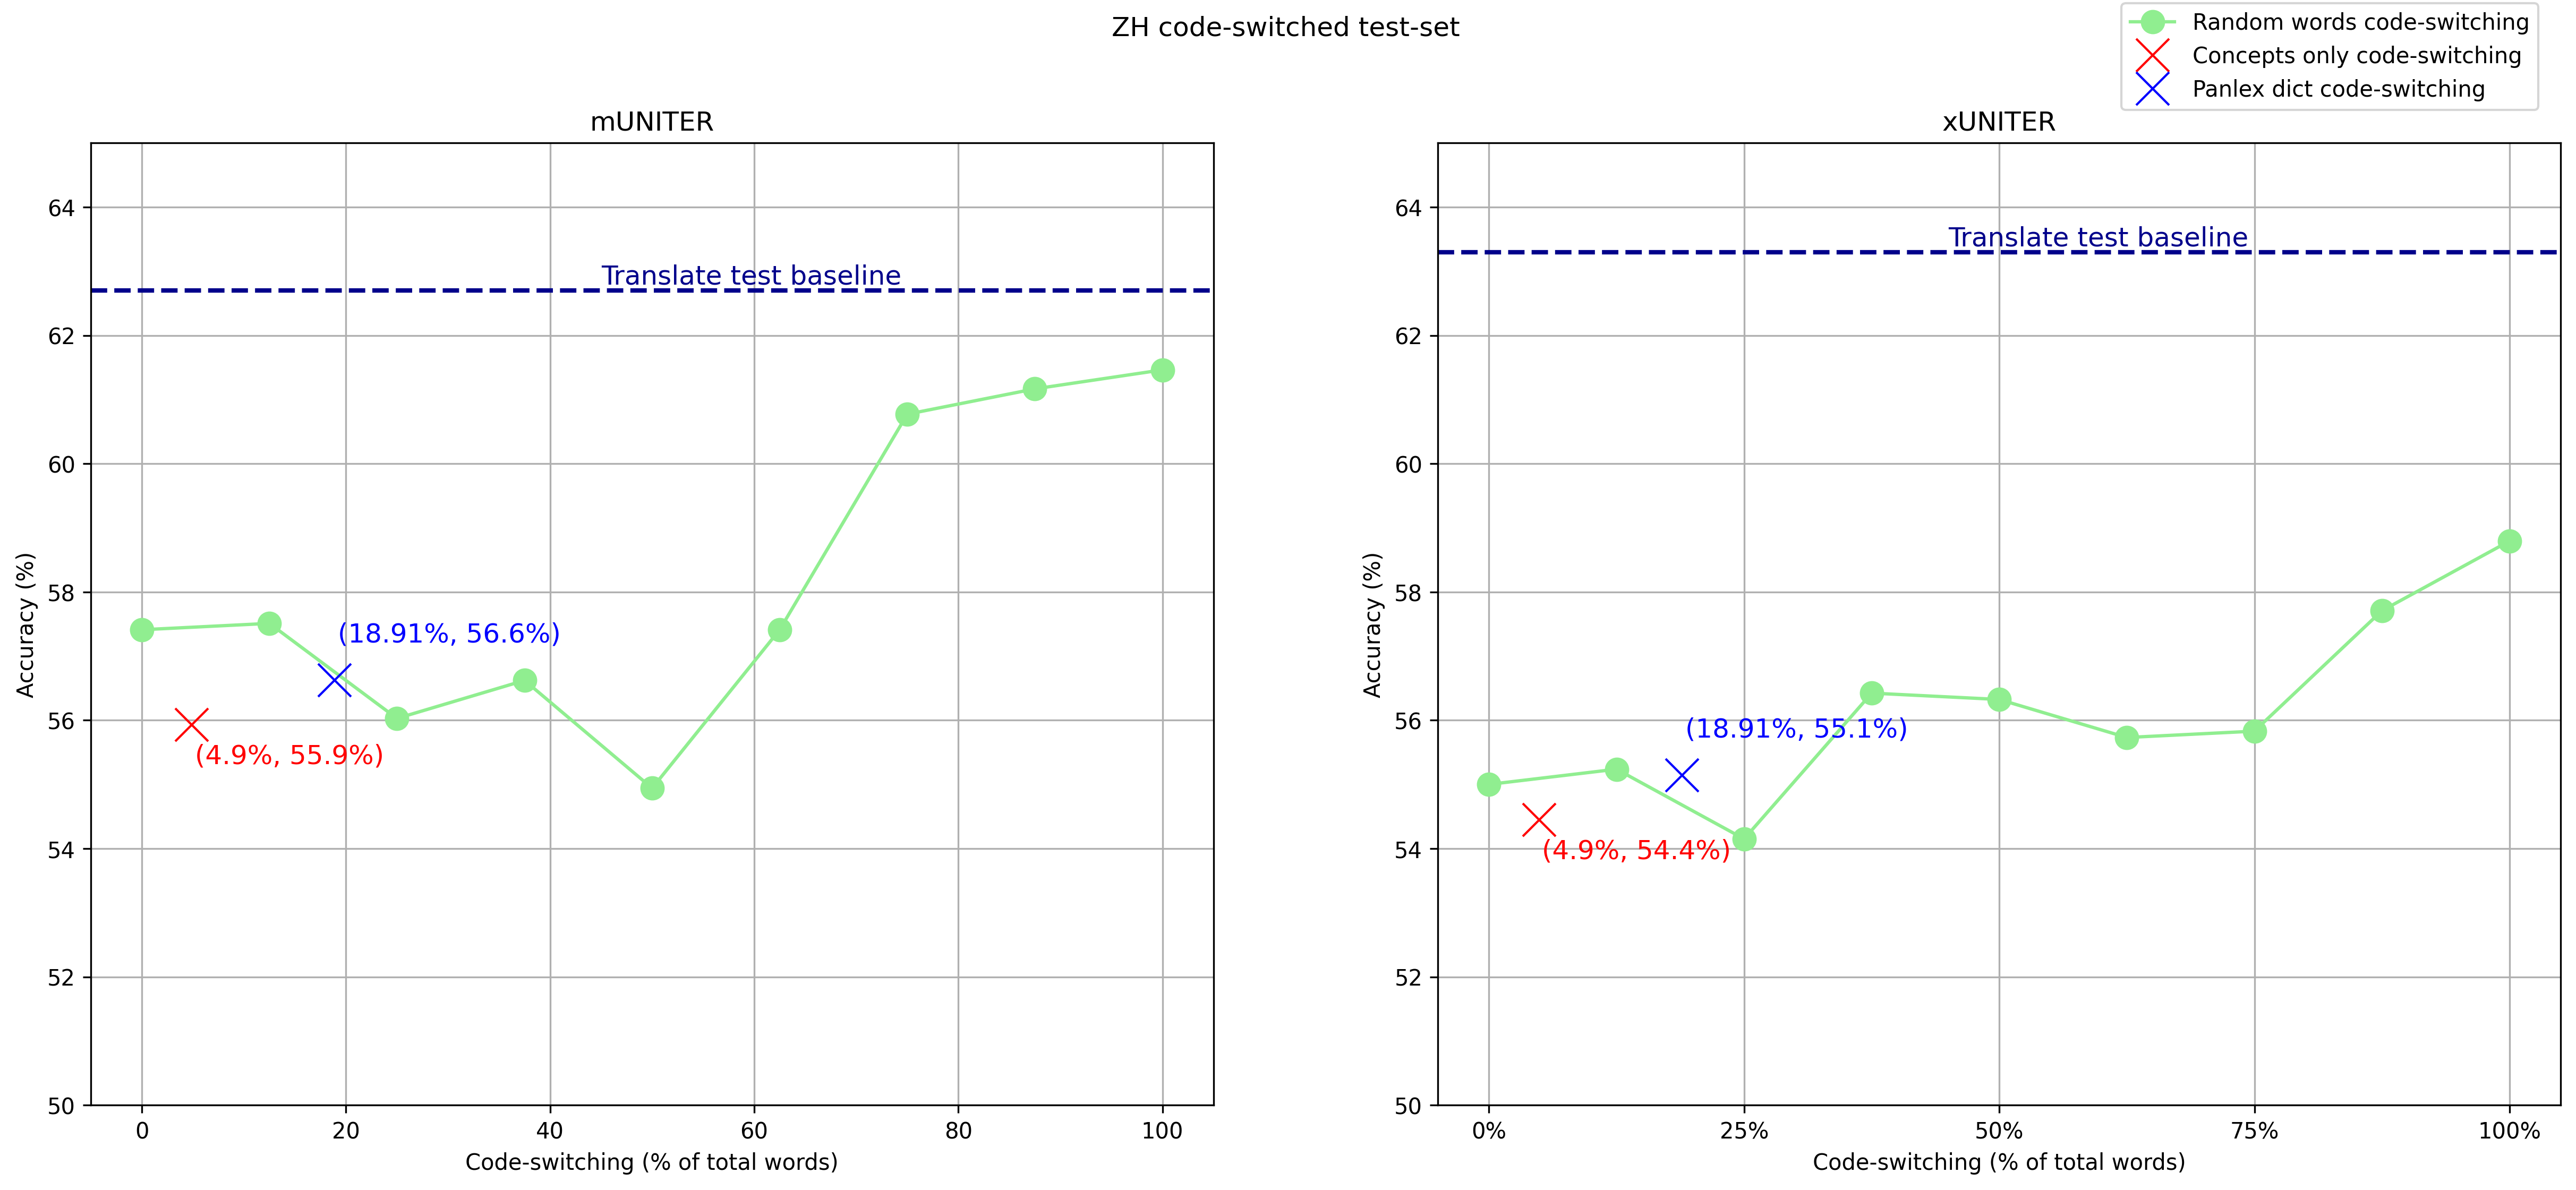

In [122]:
plot_results("zh", 
            lang_results_muniter,
            lang_results_xuniter,
            (concept_only_coverage_zh, lang_results_muniter["zh"]["concept_only"]), 
            (panlex_dict_coverage_zh, lang_results_muniter["zh"]["panlex_dict"]),
            translate_test_muniter_zh,
            (concept_only_coverage_zh, lang_results_xuniter["zh"]["concept_only"]), 
            (panlex_dict_coverage_zh, lang_results_xuniter["zh"]["panlex_dict"]),
            translate_test_xuniter_zh,
            ylim = [50, 65])